In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cm
#matplotlib.rcParams.update({'font.size': 20})
mpl.rcParams.update({'figure.dpi': 200})
mpl.rcParams.update({'figure.figsize': (3,2)})
import pandas as pd
import seaborn as sns
from copy import deepcopy

import sys
import os
import subprocess
import glob
from collections import defaultdict
import scipy as sp
from scipy import special
from itertools import product

In [2]:
directory = "/media/ian/Data/new_md_lv"

In [3]:
def fetch_xyz(file, dim=2, stride=1):
    assert(dim==2 or dim==3)
    output = []
    idx = 0
    with open(file, "r") as xyz:
        try:
            while True:
                N = int(xyz.readline())
                xyz.readline()
                arr = np.empty((N, dim))
                for i in np.arange(N):
                    line = xyz.readline()
                    _, x, y, z, _ = line.split()
                    if dim == 2:
                        arr[i] = np.array([float(x), float(y)])
                    else:
                        arr[i] = np.array([float(x), float(y), float(z)])
                if idx % stride == 0:
                    output.append(arr)
        except:
            pass
    return np.array(output)

def msd_wrap_drift(traj, L, ref=0):
    L2 = L/2
    shape = traj.shape
    timesteps = shape[0]
    N = shape[1]
    oN = 1/N
    dim = shape[2]

    wrap = np.zeros((N, dim))

    msd = np.zeros((timesteps-ref))
    
    for i in np.arange(ref+1, timesteps):
        diff = traj[i] - traj[i-1]
        cond1 = diff > L2
        cond2 = diff < -L2
        wrap += cond2.astype(int) - cond1.astype(int)

        move = traj[i] + L*wrap - traj[ref]

        drift = np.mean(move, axis=0)

        msd[i-ref] = np.mean(np.square(np.linalg.norm(move-drift, axis=-1)))
    return msd, wrap

In [17]:
def parse_tag(string, tag):
    return string.split(f"_{tag}-")[1].split("_")[0]

def get_unique_temp_phi(strings):
    temps = set([parse_tag(s, "t") for s in strings])
    phis = set([parse_tag(s, "phi") for s in strings])
    return temps, phis

In [25]:
temps, phis = get_unique_temp_phi(glob.glob(directory+"/*"))
params = list(product(temps, phis))

In [26]:
params

[('0.1', '1.5065'),
 ('0.1', '1.1903'),
 ('0.1', '0.6695'),
 ('0.1', '0.9113'),
 ('0.1', '1.8598'),
 ('0.1', '0.4650'),
 ('0.2', '1.5065'),
 ('0.2', '1.1903'),
 ('0.2', '0.6695'),
 ('0.2', '0.9113'),
 ('0.2', '1.8598'),
 ('0.2', '0.4650'),
 ('0.8', '1.5065'),
 ('0.8', '1.1903'),
 ('0.8', '0.6695'),
 ('0.8', '0.9113'),
 ('0.8', '1.8598'),
 ('0.8', '0.4650'),
 ('0.6', '1.5065'),
 ('0.6', '1.1903'),
 ('0.6', '0.6695'),
 ('0.6', '0.9113'),
 ('0.6', '1.8598'),
 ('0.6', '0.4650'),
 ('0.3', '1.5065'),
 ('0.3', '1.1903'),
 ('0.3', '0.6695'),
 ('0.3', '0.9113'),
 ('0.3', '1.8598'),
 ('0.3', '0.4650'),
 ('0.5', '1.5065'),
 ('0.5', '1.1903'),
 ('0.5', '0.6695'),
 ('0.5', '0.9113'),
 ('0.5', '1.8598'),
 ('0.5', '0.4650'),
 ('0.4', '1.5065'),
 ('0.4', '1.1903'),
 ('0.4', '0.6695'),
 ('0.4', '0.9113'),
 ('0.4', '1.8598'),
 ('0.4', '0.4650'),
 ('0.01', '1.5065'),
 ('0.01', '1.1903'),
 ('0.01', '0.6695'),
 ('0.01', '0.9113'),
 ('0.01', '1.8598'),
 ('0.01', '0.4650'),
 ('0.7', '1.5065'),
 ('0.7', '1.19

In [27]:
trajs = {}
for temp, phi in params:
    trajs[(temp, phi)] = glob.glob(directory+f"/*_t-{temp}*_phi-{phi}*")

In [28]:
msd = {}

for k, v in trajs.items():
    print(k)
    msds = []
    for t in v:
        traj = fetch_xyz(t)
        m, _ = msd_wrap_drift(traj, 5.0, ref=50)
        msds.append(m)
    msd[k] = np.mean(np.array(msds), axis=0)

('0.1', '1.5065')
('0.1', '1.1903')
('0.1', '0.6695')
('0.1', '0.9113')
('0.1', '1.8598')
('0.1', '0.4650')
('0.2', '1.5065')
('0.2', '1.1903')
('0.2', '0.6695')
('0.2', '0.9113')
('0.2', '1.8598')
('0.2', '0.4650')
('0.8', '1.5065')
('0.8', '1.1903')
('0.8', '0.6695')
('0.8', '0.9113')
('0.8', '1.8598')
('0.8', '0.4650')
('0.6', '1.5065')
('0.6', '1.1903')
('0.6', '0.6695')
('0.6', '0.9113')
('0.6', '1.8598')
('0.6', '0.4650')
('0.3', '1.5065')
('0.3', '1.1903')
('0.3', '0.6695')
('0.3', '0.9113')
('0.3', '1.8598')
('0.3', '0.4650')
('0.5', '1.5065')
('0.5', '1.1903')
('0.5', '0.6695')
('0.5', '0.9113')
('0.5', '1.8598')
('0.5', '0.4650')
('0.4', '1.5065')
('0.4', '1.1903')
('0.4', '0.6695')
('0.4', '0.9113')
('0.4', '1.8598')
('0.4', '0.4650')
('0.01', '1.5065')
('0.01', '1.1903')
('0.01', '0.6695')
('0.01', '0.9113')
('0.01', '1.8598')
('0.01', '0.4650')
('0.7', '1.5065')
('0.7', '1.1903')
('0.7', '0.6695')
('0.7', '0.9113')
('0.7', '1.8598')
('0.7', '0.4650')


In [43]:
sorted(lphis)

[0.465, 0.6695, 0.9113, 1.1903, 1.5065, 1.8598]

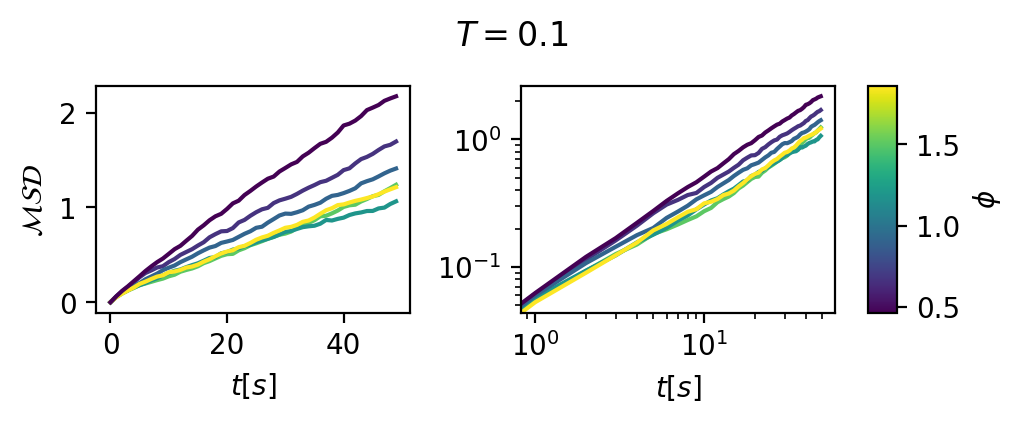

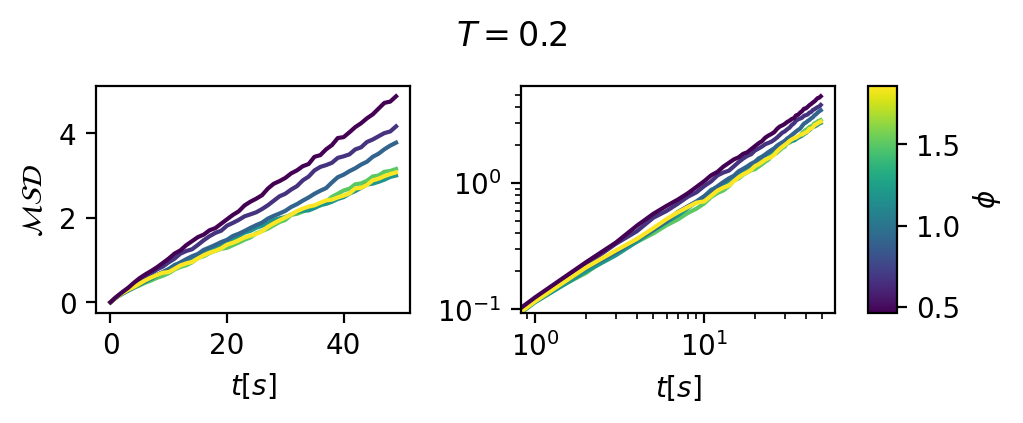

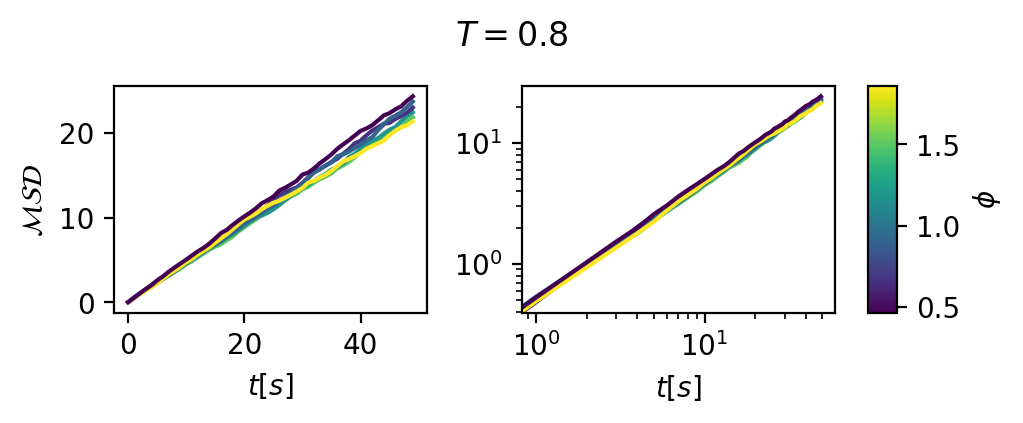

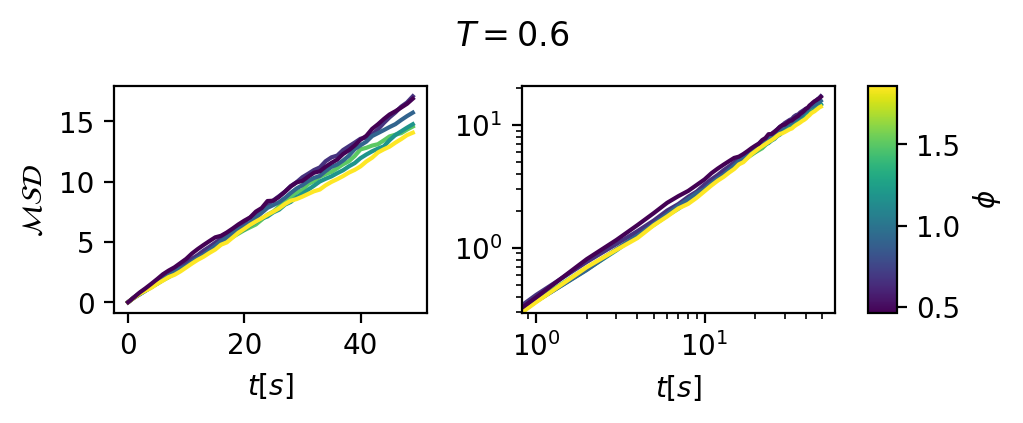

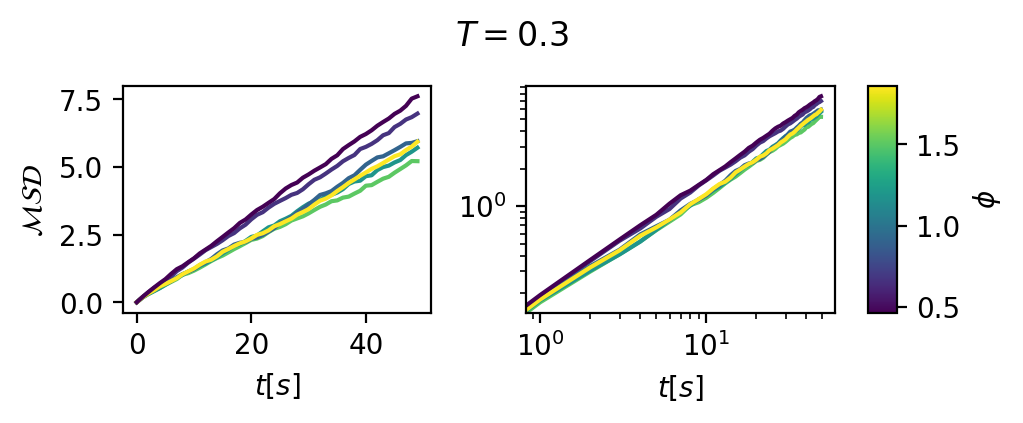

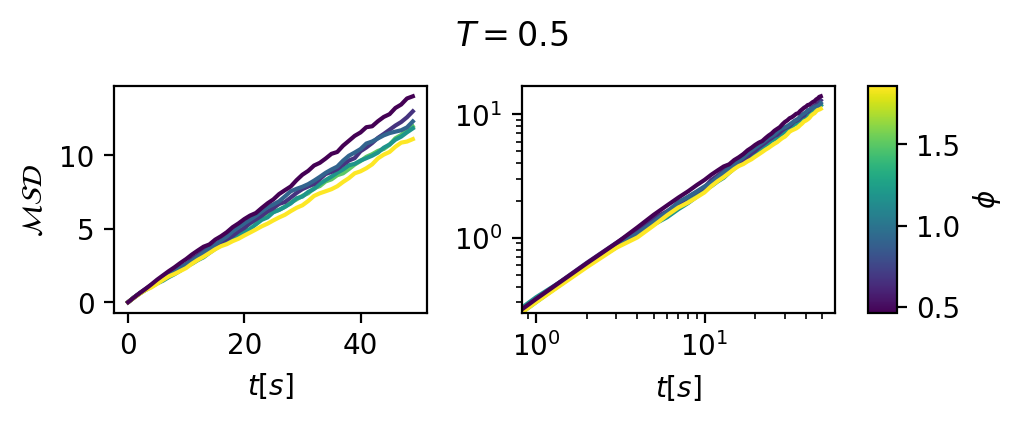

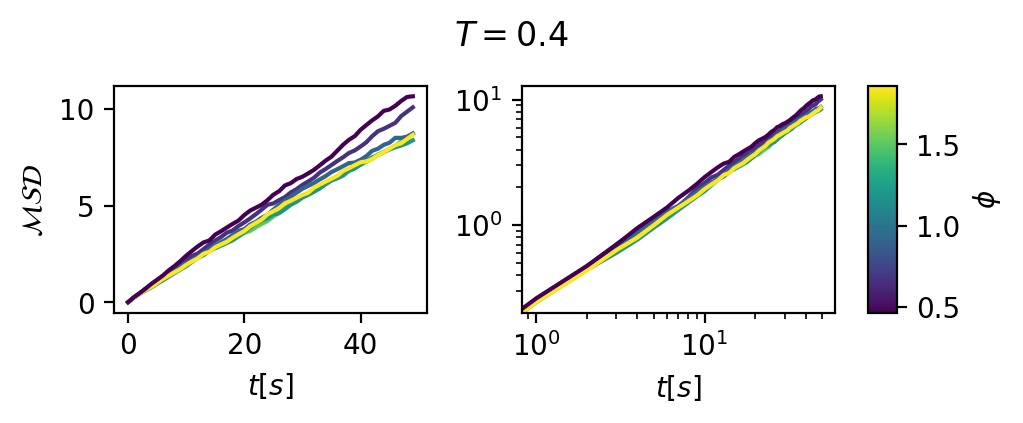

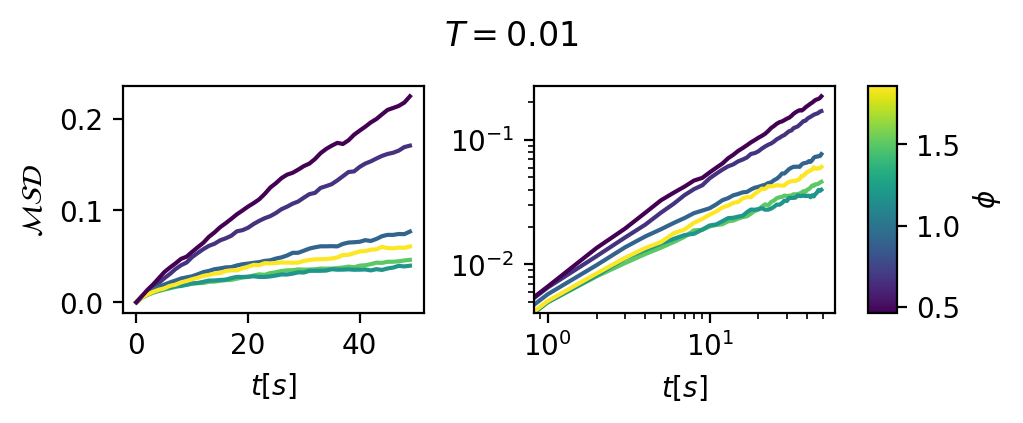

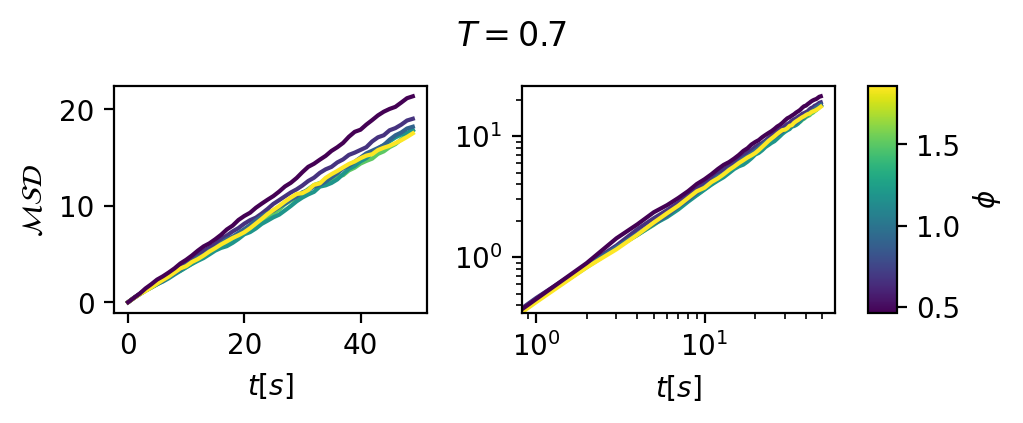

In [40]:
cmap = cm.viridis
lphis = [float(f) for f in phis]
norm = colors.Normalize(vmin=np.min(lphis), vmax=np.max(lphis))
sm = cm.ScalarMappable(norm=norm, cmap=cmap)

x = np.linspace(0,50, 50, endpoint=False)

for temp in temps:
    fig, axs = plt.subplots(1,2, figsize=(5,2), constrained_layout=True)
    for phi in phis:
        axs[0].plot(x, msd[(temp, phi)], color=cmap(norm(float(phi))))
        axs[1].plot(x, msd[(temp, phi)], color=cmap(norm(float(phi))))
    fig.colorbar(sm, ax=axs, label=r"$\phi$")
    fig.suptitle(rf"$T={temp}$")
    axs[1].set_yscale("log")
    axs[1].set_xscale("log")
    axs[0].set_ylabel(r"$\mathcal{MSD}$")
    axs[0].set_xlabel(r"$t[s]$")
    axs[1].set_xlabel(r"$t[s]$")

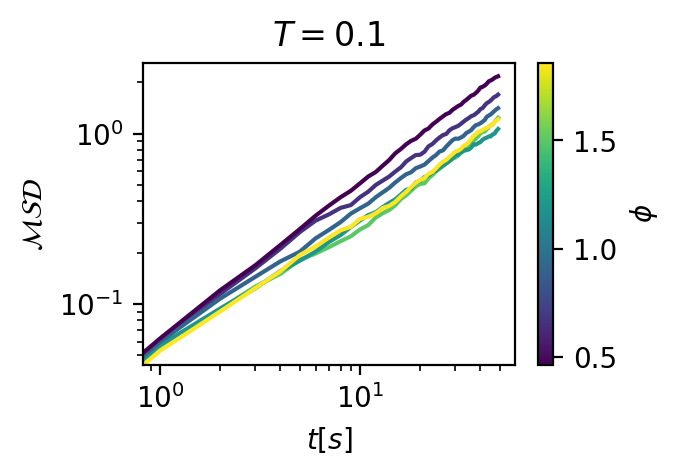

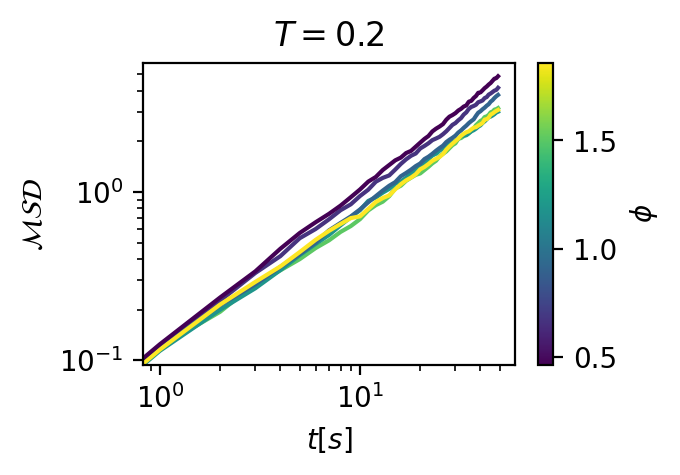

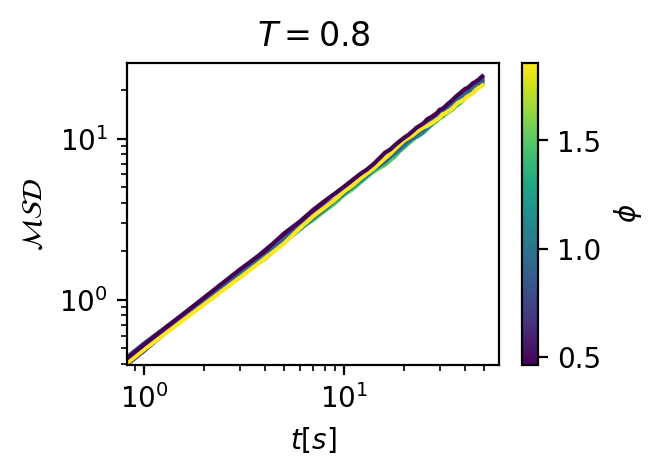

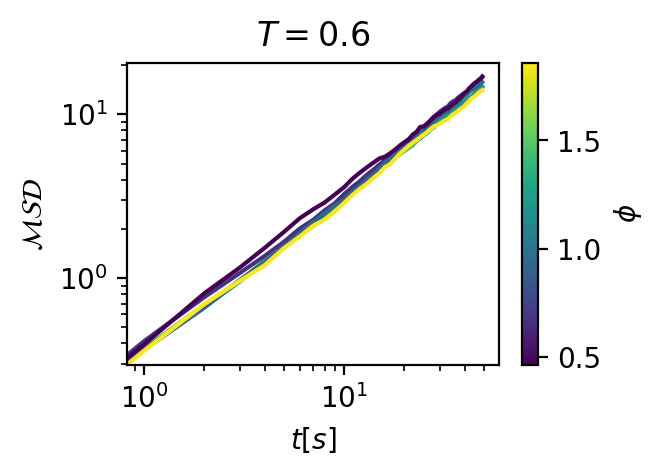

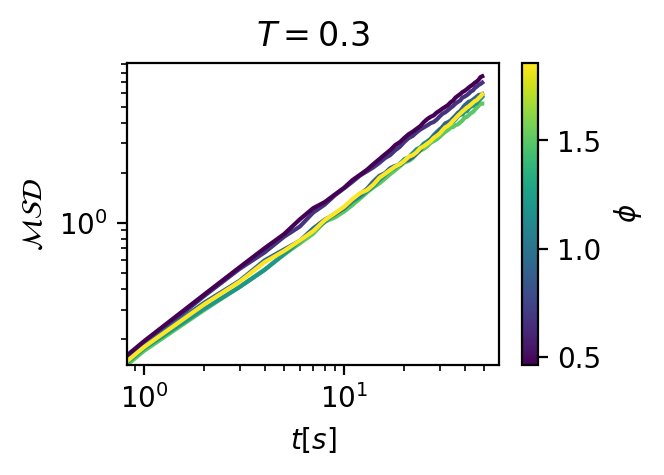

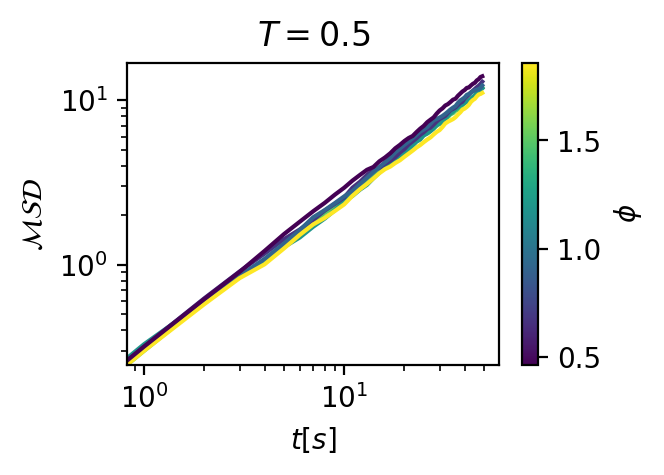

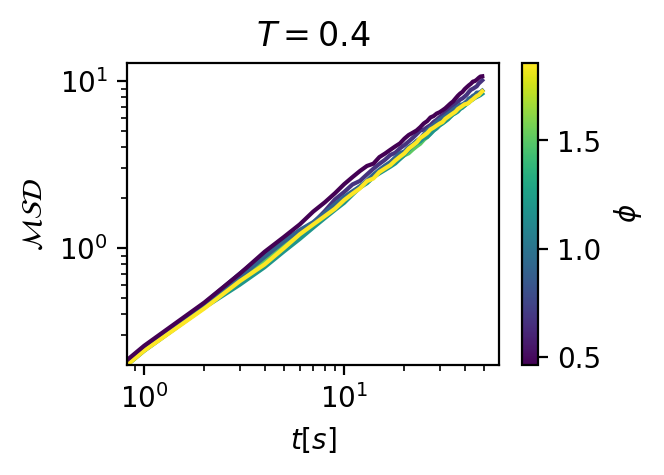

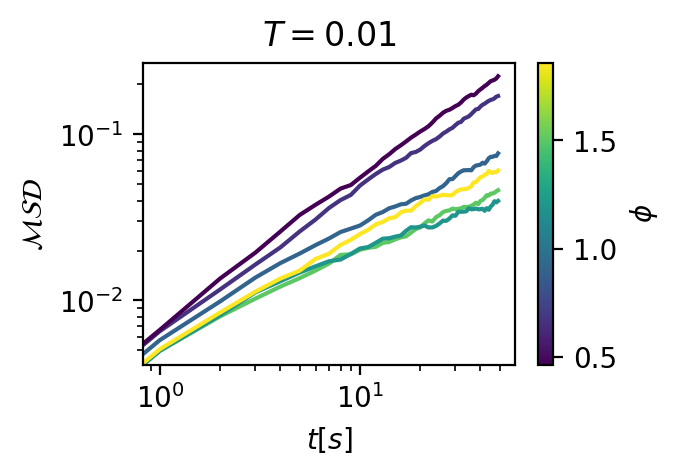

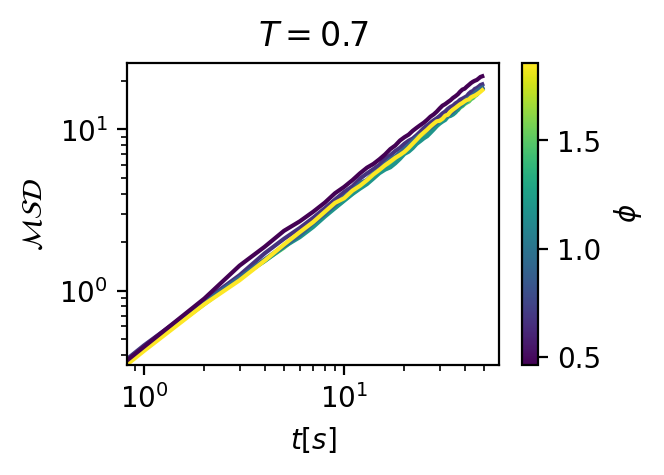

In [30]:
cmap = cm.viridis
lphis = [float(f) for f in phis]
norm = colors.Normalize(vmin=np.min(lphis), vmax=np.max(lphis))
sm = cm.ScalarMappable(norm=norm, cmap=cmap)

x = np.linspace(0,50, 50, endpoint=False)

for temp in temps:
    plt.figure()
    for phi in phis:
        plt.plot(x, msd[(temp, phi)], color=cmap(norm(float(phi))))
    plt.colorbar(sm, label=r"$\phi$")
    plt.title(rf"$T={temp}$")
    plt.ylabel(r"$\mathcal{MSD}$")
    plt.xlabel(r"$t[s]$")
    plt.xscale('log')
    plt.yscale('log')
    #break

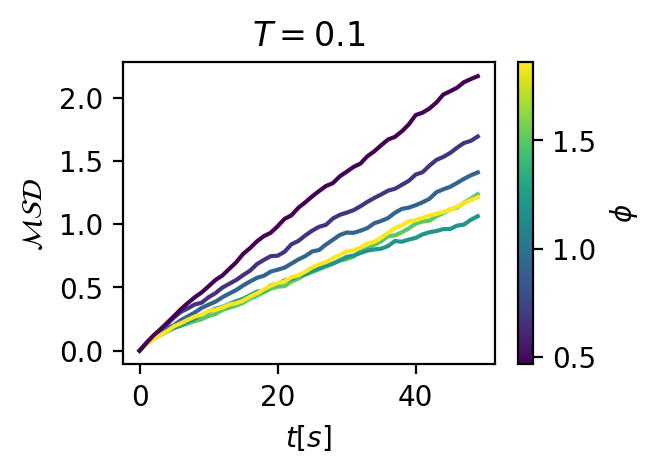

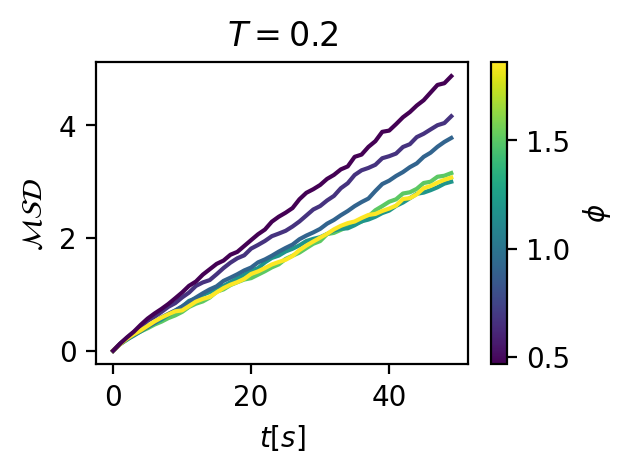

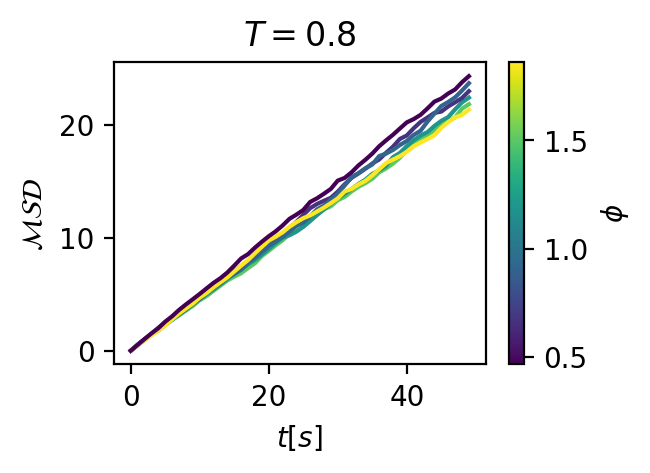

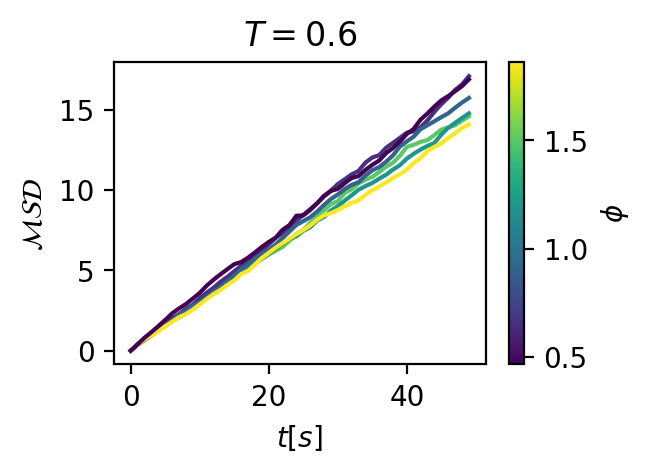

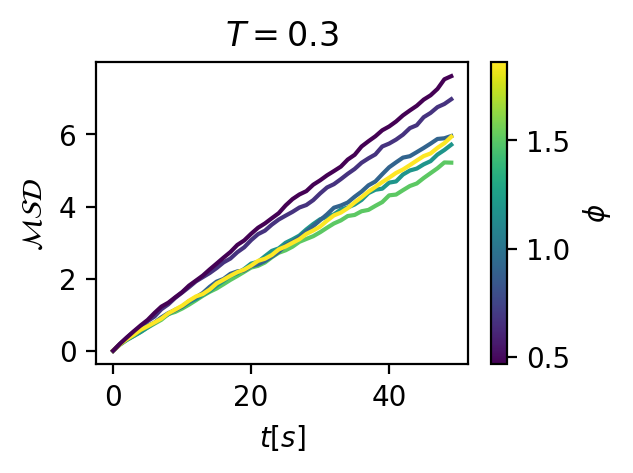

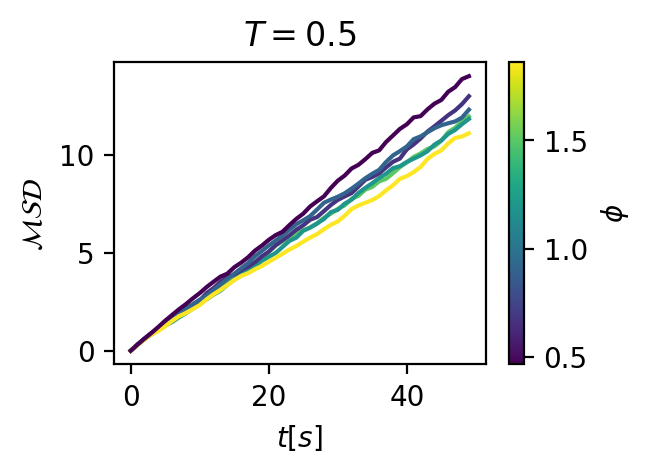

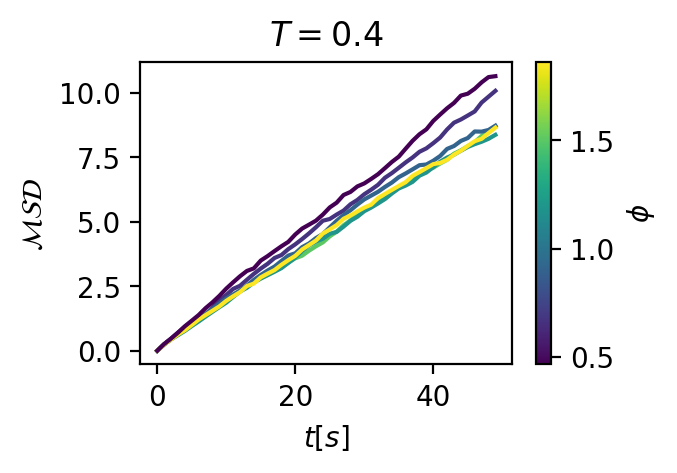

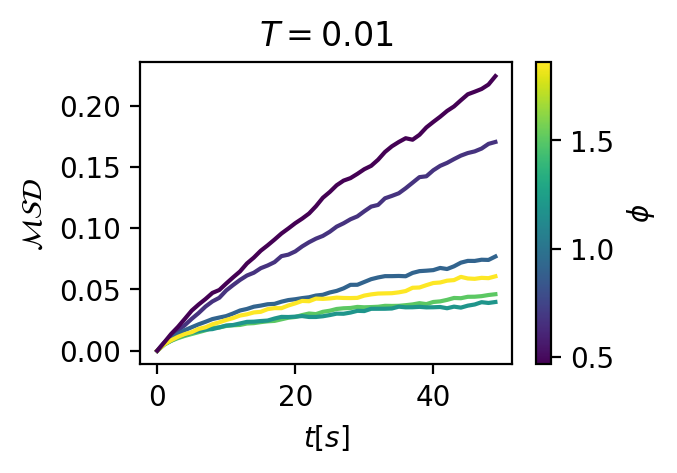

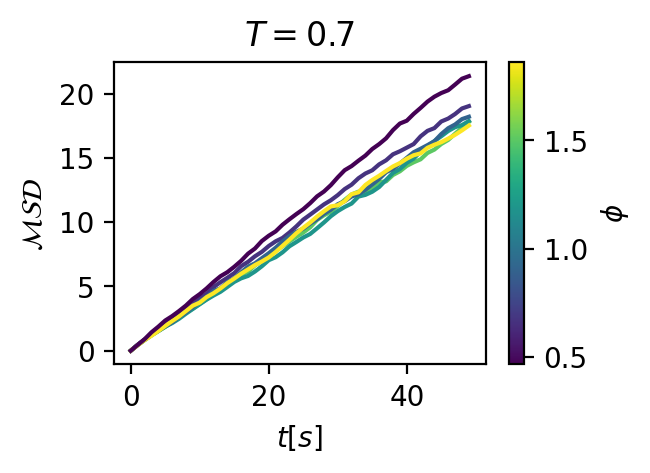

In [44]:
cmap = cm.viridis
lphis = [float(f) for f in phis]
norm = colors.Normalize(vmin=np.min(lphis), vmax=np.max(lphis))
sm = cm.ScalarMappable(norm=norm, cmap=cmap)

x = np.linspace(0,50, 50, endpoint=False)

for temp in temps:
    plt.figure()
    for phi in phis:
        plt.plot(x, msd[(temp, phi)], color=cmap(norm(float(phi))))
    plt.colorbar(sm, label=r"$\phi$")
    plt.title(rf"$T={temp}$")
    plt.ylabel(r"$\mathcal{MSD}$")
    plt.xlabel(r"$t[s]$")
    #break